In [14]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
data_path = "../../data/adam_wbn"
image_path = "./images"
lr_to_p_fn = lambda js: np.sqrt(0.001/js["optimizer"]["lr"])
wd_to_log_fn = lambda js: np.log(js["optimizer"]["lambda_wd"])
p_to_p_fn = lambda js: js["norm"]["norm_multiply"]
acc_fn = lambda p : max_acc(get_stats(p,"test_stats"))

Max test accuracy of Standard is 86.14% with lr 0.002778
Max test accuracy of norm is 86.41% with p 3.4
Max test accuracy of cnorm is 86.03% with p 3.6
Max test accuracy of cnormu is 86.41% with p 3.2
Max test accuracy of gcstdu is 86.96% with p 3.6
Max test accuracy of wd is 85.03% with lambda 1.0000000000000004e-06
[1.00000e-06 2.00000e-06 4.00000e-06 8.00000e-06 1.60000e-05 3.20000e-05
 6.40000e-05 1.28000e-04 2.56000e-04 5.12000e-04 1.02400e-03 2.04800e-03
 4.09600e-03 8.19200e-03 1.63840e-02 3.27680e-02 6.55360e-02 1.31072e-01]


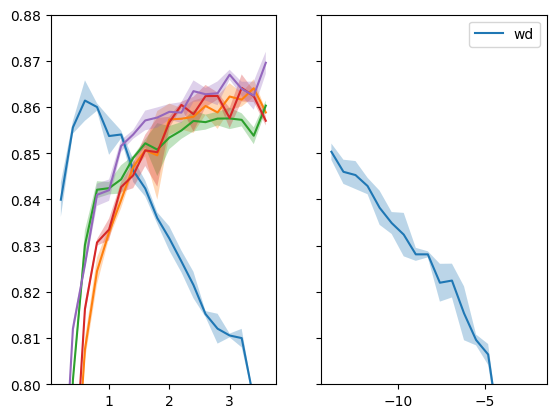

In [20]:
fig,axs = plt.subplots(ncols=2,nrows=1,sharey="row")

x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/noreg"),lr_to_p_fn, acc_fn,axs[0], norm=False,label="noreg")
print("Max test accuracy of Standard is {0}% with lr {1}".format(round(100*y.max(),2),round(0.001/(x[y.argmax()]**2),6)))

for exp in ["norm","cnorm","cnormu","gcstdu"]:
    x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}",skip=lambda s : s.endswith("0")),p_to_p_fn,acc_fn, axs[0], norm=False, label="norm")
    print("Max test accuracy of {0} is {1}% with p {2}".format(exp,round(100*y.max(),2),x[y.argmax()]))

x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/wd"),wd_to_log_fn,acc_fn,axs[1], norm=False,label="wd")
print("Max test accuracy of wd is {0}% with lambda {1}".format(round(100*y.max(),2),np.exp(x[y.argmax()])))

print(np.exp(np.sort(x)))

ax = plt.gca()
ax.set_ylim(0.8,0.88)
plt.legend()

In [22]:
start_wd = 1e-06
for i in range(1,6):
    with open("../../data/adam_wbn/wd/1e-06/settings.json", "r") as f:
        js = json.load(f)

    wd = start_wd/(2**i)
    js["optimizer"]["lambda_wd"] = wd
    del js["save_path"]
    js["at_step"] = 0
    os.makedirs(f"../../data/adam_wbn/wd/{str(round(wd,8))}",exist_ok=True)
    with open(f"../../data/adam_wbn/wd/{str(round(wd,8))}/settings.json","w") as f:
        json.dump(js,f)

    print(f"python code/main.py ./data/adam_wbn/wd/{str(round(wd,8))}/ --reset \n")


python code/main.py ./data/adam_wbn/wd/5e-07/ --reset 

python code/main.py ./data/adam_wbn/wd/2.5e-07/ --reset 

python code/main.py ./data/adam_wbn/wd/1.2e-07/ --reset 

python code/main.py ./data/adam_wbn/wd/6e-08/ --reset 

python code/main.py ./data/adam_wbn/wd/3e-08/ --reset 



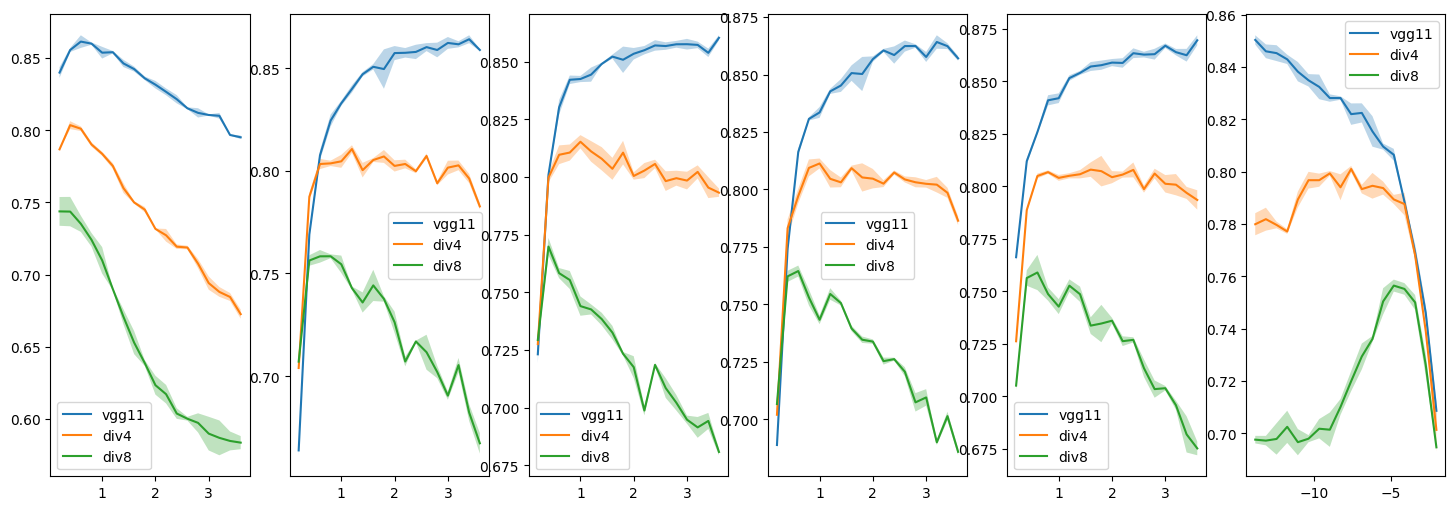

In [17]:
fig,axs = plt.subplots(ncols=6,nrows=1,sharey="col")
fig.set_size_inches(18,6)
for ax,exp,x_fn in zip(axs,["noreg","norm","cnorm","cnormu","gcstdu","wd"],[lr_to_p_fn,p_to_p_fn,p_to_p_fn,p_to_p_fn,p_to_p_fn,wd_to_log_fn]):
    
    x,y,y_normed = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}"),x_fn,acc_fn, ax, "vgg11",norm=False)
    x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}_div4"),x_fn,acc_fn, ax, "div4",norm=False)
    x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}_div8"),x_fn,acc_fn, ax, "div8",norm=False)
    ax.legend()

In [18]:
fig,axs = plot_data(f"{data_path}/noreg/0.025", lambda d :     
                    {0 :    {
                            0 :  
                                ("Mean of Channel Means", d["cmean_mean"]) , 
                            1 :  
                                ("Variance of Channel Means", d["cmean_var"]) 
                            },
                    1 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,6)
lines, labels = axs[0][0].get_legend_handles_labels()

fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.08), bbox_transform=fig.transFigure)
fig.savefig(f"{image_path}/noreg_0.025_cmeans_cnorms.png", bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/adam_wbn//noreg/0.025/states'